* Authors: Andrea Jiménez Zuñiga e Isabel Afán de Ribera
* Date: 04/12/2020
* Institution: CUNEF

# 02. Feature Engineering

## Import libraries

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler  
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest # outliers
import random 
import warnings
warnings.filterwarnings("ignore")
random.seed(12345)



## Choosing Variables

The following variable indicates the route where we have stored our dataset. We then upload the data.

In [76]:
data_path = '../data/EDA_loans_final.csv'

In [77]:
loans = pd.read_csv(data_path)
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2300,2300,2300.0,36 months,12.62%,77.08,C,C1,NaN,NaN,...,100.0,0,0,7100,3911,3400,0,N,Cash,N
1,16000,16000,16000.0,60 months,12.62%,360.95,C,C1,teacher,10+ years,...,100.0,0,0,319900,44830,2400,16000,N,Cash,N
2,6025,6025,6025.0,36 months,15.05%,209.01,C,C4,Front Office,7 years,...,0.0,0,0,137700,12425,17600,0,N,Cash,N
3,20400,20400,20400.0,36 months,9.44%,652.91,B,B1,Manager,10+ years,...,0.0,0,0,103358,62335,44400,56458,N,Cash,N
4,13000,13000,13000.0,36 months,11.99%,431.73,B,B5,Paramedic,10+ years,...,100.0,0,0,19602,15332,7800,11802,N,Cash,N


In [78]:
np.unique(loans['loan_status'])

array(['Charged Off', 'Current', 'Default', 'Fully Paid',
       'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'],
      dtype=object)

As the dataset has 884,876 observations and 151 variables, we have chosen some of the most relevant variables that we have considered by studying the variables and researching. As a result, we have chosen 21 primary variables to continue with the analysis, which 15 of them are numerics and 6 are categorical variables.

These variables are:
1. `loan_amnt`: Loan amounts 
2. `emp_length`: Length the borrowers have been employed. 
3. `home_ownership`: Type of home ownership. 
4. `annual_inc`: Annual income of each borrower. 
5. `int_rate`: Interest rate. 
6. `dti`: Debt to income ratio. 
7. `installment`: Installment amount, which is tha monthly payment by the borrower if the loan originates. 
8. `revol_bal`: Total Credit Revolving Balance. 
9. `revol_util`: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. 
10. `open_acc`: The number of open credit lines in the borrower's credit file. 
11. `verification_status`: Verification status.
12. `term`: Term, which is the duration of the loan.
13. `grade`: Credit grades. 
14. `loan_status`: Loan status. 
15. `purpose`: A category provided by the borrower for the loan request. 
16. `sub_grade`: LC assigned loan subgrade. 
17. `pub_rec`: Number of derogatory public records. 
18. `inq_last_6mths`: The number of inquiries in past 6 months (excluding auto and mortgage inquiries). 
19. `delinq_2yrs`: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. 
20. `tax_liens`: Number of tax liens. 
21. `pub_rec_bankruptcies`: Number of public record bankruptcies. 


After the selection of variables our dataset is as follows:

In [79]:
loans_final = loans[['term', 'loan_amnt','installment','int_rate', 'home_ownership','purpose',
                    'verification_status', 'annual_inc', 'emp_length', 'revol_util',
                    'revol_bal','pub_rec','open_acc', 'inq_last_6mths','delinq_2yrs','dti',
                    'tax_liens','pub_rec_bankruptcies',
                    'loan_status','grade','sub_grade']]

loans_final.head()

,term,loan_amnt,installment,int_rate,home_ownership,purpose,verification_status,annual_inc,emp_length,revol_util,...,pub_rec,open_acc,inq_last_6mths,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,loan_status,grade,sub_grade
0,36 months,2300,77.08,12.62%,OWN,credit_card,Not Verified,10000.0,NaN,55.1%,...,0,4,1,0,21.61,0,0,Current,C,C1
1,60 months,16000,360.95,12.62%,MORTGAGE,debt_consolidation,Not Verified,94000.0,10+ years,105.8%,...,0,9,0,0,25.61,0,0,Current,C,C1
2,36 months,6025,209.01,15.05%,MORTGAGE,home_improvement,Not Verified,46350.0,7 years,44.9%,...,0,11,0,0,8.88,0,0,Current,C,C4
3,36 months,20400,652.91,9.44%,RENT,car,Source Verified,44000.0,10+ years,18.7%,...,0,15,1,0,27.06,0,0,Current,B,B1
4,36 months,13000,431.73,11.99%,MORTGAGE,debt_consolidation,Source Verified,85000.0,10+ years,88%,...,0,5,0,1,6.79,0,0,Current,B,B5


Our target variable is loan_status so we have to remove the observations corresponding to the current loan status option as we do not know whether or not these people will continue to pay their loan in the following periods and, therefore, we are not interested in including them in our model.

In [80]:
loans_sin_current = loans_final[loans_final.loan_status != 'Current']

In [81]:
np.unique(loans_sin_current['loan_status'])

array(['Charged Off', 'Default', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)'], dtype=object)

In [82]:
sub_loans = loans_sin_current
sub_loans = sub_loans

And the types of our variables.

In [83]:
sub_loans.dtypes

term                     object
loan_amnt                 int64
installment             float64
int_rate                 object
home_ownership           object
purpose                  object
verification_status      object
annual_inc              float64
emp_length               object
revol_util               object
revol_bal                 int64
pub_rec                   int64
open_acc                  int64
inq_last_6mths            int64
delinq_2yrs               int64
dti                     float64
tax_liens                 int64
pub_rec_bankruptcies      int64
loan_status              object
grade                    object
sub_grade                object
dtype: object

## Cleaning the dataset

To make the work easier, we will eliminate the string elements that contain the variables emp_length, revol_util, int_rate and term, and thus transform them from object type to numerical type.

In [84]:
sub_loans['revol_util']=sub_loans['revol_util'].str.strip('%')


In [85]:
sub_loans['emp_length']=sub_loans['emp_length'].str.strip('<')
sub_loans['emp_length']=sub_loans['emp_length'].str.strip('+')
sub_loans['emp_length']=sub_loans['emp_length'].str.strip('years')
sub_loans['emp_length']=sub_loans['emp_length'].str.strip('+ years')

In [86]:
sub_loans['emp_length']=sub_loans['emp_length'].astype('float')
np.unique(sub_loans['emp_length'])

array([ 1.,  2.,  3., ..., nan, nan, nan])

In [87]:
sub_loans['int_rate']=sub_loans['int_rate'].str.strip('%')
sub_loans['int_rate']=sub_loans['int_rate'].astype('float')

In [88]:
sub_loans['term']=sub_loans['term'].str.strip('months')
sub_loans['term']=sub_loans['term'].astype('float')

sub_loans.dtypes

term                    float64
loan_amnt                 int64
installment             float64
int_rate                float64
home_ownership           object
purpose                  object
verification_status      object
annual_inc              float64
emp_length              float64
revol_util               object
revol_bal                 int64
pub_rec                   int64
open_acc                  int64
inq_last_6mths            int64
delinq_2yrs               int64
dti                     float64
tax_liens                 int64
pub_rec_bankruptcies      int64
loan_status              object
grade                    object
sub_grade                object
dtype: object

In [89]:
sub_loans['revol_util']=sub_loans['revol_util'].str.strip('%')
sub_loans['revol_util']=sub_loans['revol_util'].astype('float')

In [90]:
sub_loans['loan_amnt']=sub_loans['loan_amnt'].astype('float')
sub_loans.dtypes

term                    float64
loan_amnt               float64
installment             float64
int_rate                float64
home_ownership           object
purpose                  object
verification_status      object
annual_inc              float64
emp_length              float64
revol_util              float64
revol_bal                 int64
pub_rec                   int64
open_acc                  int64
inq_last_6mths            int64
delinq_2yrs               int64
dti                     float64
tax_liens                 int64
pub_rec_bankruptcies      int64
loan_status              object
grade                    object
sub_grade                object
dtype: object

### Numerical columns

Now we check which of our variables are numerical. We have 19 columns in total.

In [91]:
numerical_columns = sub_loans.dtypes[sub_loans.dtypes != "object"].index
print("# of Numerical columns: ", len(numerical_columns))

# of Numerical columns:  15


In [92]:
numerical_columns

Index(['term', 'loan_amnt', 'installment', 'int_rate', 'annual_inc',
       'emp_length', 'revol_util', 'revol_bal', 'pub_rec', 'open_acc',
       'inq_last_6mths', 'delinq_2yrs', 'dti', 'tax_liens',
       'pub_rec_bankruptcies'],
      dtype='object')

## Managing the data

Next, we are going to find the missing values in our dataset. 

In [93]:
percentage_NaN = sub_loans.apply(lambda x: sum(x.isna()/len(sub_loans)))
percentage_NaN.sort_values(ascending = False)

emp_length              0.054276
revol_util              0.000506
dti                     0.000045
sub_grade               0.000000
loan_amnt               0.000000
installment             0.000000
int_rate                0.000000
home_ownership          0.000000
purpose                 0.000000
verification_status     0.000000
annual_inc              0.000000
revol_bal               0.000000
grade                   0.000000
pub_rec                 0.000000
open_acc                0.000000
inq_last_6mths          0.000000
delinq_2yrs             0.000000
tax_liens               0.000000
pub_rec_bankruptcies    0.000000
loan_status             0.000000
term                    0.000000
dtype: float64

In order to take care of the missing values, we are going to use SimpleImputer, specifying that we want to replace the missing values of each attribute with its median. 

In [94]:
imputer = SimpleImputer(strategy="median")

As the Imputer can only be used with numerical values, we have created a copy of the data without the test attributes. 

In [95]:
sub_loans_num = sub_loans.select_dtypes(include=[np.number])

In [96]:
imputer.fit(sub_loans_num)

SimpleImputer(strategy='median')

In [97]:
imputer.statistics_

array([3.6000e+01, 1.2600e+04, 3.8063e+02, 1.2990e+01, 6.5000e+04,
       6.0000e+00, 5.3600e+01, 1.1160e+04, 0.0000e+00, 1.1000e+01,
       0.0000e+00, 0.0000e+00, 1.7920e+01, 0.0000e+00, 0.0000e+00])

Now we are going to transform the training set with this imputer by replacing missing values by the medians. 

In [98]:
X = imputer.transform(sub_loans_num)

The result is a plain NumPy array containing the transformed features. 

In [99]:
sub_loans_tr = pd.DataFrame(X, columns=sub_loans_num.columns,
                          index=sub_loans.index)

In [100]:
sub_loans_tr = pd.DataFrame(X, columns=sub_loans_num.columns,
                          index=sub_loans_num.index)

In [101]:
sub_loans_tr

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,inq_last_6mths,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies
8,36.0,11575.0,359.26,7.35,153000.0,6.0,22.7,8550.0,1.0,20.0,0.0,0.0,16.99,0.0,1.0
10,36.0,7200.0,285.70,24.85,50000.0,2.0,98.9,3560.0,0.0,4.0,0.0,0.0,6.07,0.0,0.0
24,36.0,7500.0,232.79,7.35,110000.0,7.0,27.2,23348.0,0.0,19.0,2.0,0.0,13.12,0.0,0.0
42,60.0,10000.0,243.29,16.02,51979.0,7.0,20.0,5733.0,2.0,15.0,0.0,0.0,10.11,0.0,2.0
91,36.0,14000.0,492.34,16.02,75000.0,7.0,90.0,2700.0,0.0,4.0,0.0,1.0,10.86,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884869,36.0,11575.0,404.61,15.59,25400.0,10.0,65.0,18266.0,0.0,9.0,0.0,0.0,27.08,0.0,0.0
884870,36.0,12000.0,398.52,11.99,63000.0,1.0,69.7,21110.0,0.0,13.0,0.0,1.0,23.69,0.0,0.0
884873,60.0,13000.0,316.07,15.99,35000.0,5.0,61.3,11031.0,1.0,9.0,0.0,0.0,30.90,0.0,1.0
884874,60.0,12000.0,317.86,19.99,64400.0,1.0,30.6,8254.0,0.0,17.0,2.0,1.0,27.19,0.0,0.0


We select our categorical variables. We do this by just choosing those variables that are object.

In [102]:
sub_loans_cat = sub_loans.select_dtypes(include=[np.object])

In [103]:
sub_loans_cat

,home_ownership,purpose,verification_status,loan_status,grade,sub_grade
8,OWN,credit_card,Not Verified,Fully Paid,A,A4
10,RENT,debt_consolidation,Source Verified,Fully Paid,E,E3
24,MORTGAGE,debt_consolidation,Not Verified,Fully Paid,A,A4
42,RENT,debt_consolidation,Source Verified,Fully Paid,C,C5
91,MORTGAGE,debt_consolidation,Verified,Fully Paid,C,C5
...,...,...,...,...,...,...
884869,RENT,credit_card,Verified,Fully Paid,D,D1
884870,MORTGAGE,credit_card,Verified,Charged Off,B,B5
884873,RENT,debt_consolidation,Verified,Charged Off,D,D2
884874,RENT,debt_consolidation,Source Verified,Charged Off,E,E3


We need to merge our two dataframes (the one that contains the numerical features and the one that cointains the categorical ones) in order to have one dataset with all the variables. 

In [104]:
sub_loans = pd.merge(sub_loans_tr, sub_loans_cat, left_index = True, right_index = True)
sub_loans

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,home_ownership,purpose,verification_status,loan_status,grade,sub_grade
8,36.0,11575.0,359.26,7.35,153000.0,6.0,22.7,8550.0,1.0,20.0,...,0.0,16.99,0.0,1.0,OWN,credit_card,Not Verified,Fully Paid,A,A4
10,36.0,7200.0,285.70,24.85,50000.0,2.0,98.9,3560.0,0.0,4.0,...,0.0,6.07,0.0,0.0,RENT,debt_consolidation,Source Verified,Fully Paid,E,E3
24,36.0,7500.0,232.79,7.35,110000.0,7.0,27.2,23348.0,0.0,19.0,...,0.0,13.12,0.0,0.0,MORTGAGE,debt_consolidation,Not Verified,Fully Paid,A,A4
42,60.0,10000.0,243.29,16.02,51979.0,7.0,20.0,5733.0,2.0,15.0,...,0.0,10.11,0.0,2.0,RENT,debt_consolidation,Source Verified,Fully Paid,C,C5
91,36.0,14000.0,492.34,16.02,75000.0,7.0,90.0,2700.0,0.0,4.0,...,1.0,10.86,0.0,0.0,MORTGAGE,debt_consolidation,Verified,Fully Paid,C,C5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884869,36.0,11575.0,404.61,15.59,25400.0,10.0,65.0,18266.0,0.0,9.0,...,0.0,27.08,0.0,0.0,RENT,credit_card,Verified,Fully Paid,D,D1
884870,36.0,12000.0,398.52,11.99,63000.0,1.0,69.7,21110.0,0.0,13.0,...,1.0,23.69,0.0,0.0,MORTGAGE,credit_card,Verified,Charged Off,B,B5
884873,60.0,13000.0,316.07,15.99,35000.0,5.0,61.3,11031.0,1.0,9.0,...,0.0,30.90,0.0,1.0,RENT,debt_consolidation,Verified,Charged Off,D,D2
884874,60.0,12000.0,317.86,19.99,64400.0,1.0,30.6,8254.0,0.0,17.0,...,1.0,27.19,0.0,0.0,RENT,debt_consolidation,Source Verified,Charged Off,E,E3


## Handling Text and Categorical Attributes

As the categorical attributes were left out when cleaning the data, we are coing to convert these categories from text to numbers. 

First, we need to study the categorical attributes in order to know what method to use when transforming them to numericals. There are 5 categorical columns in total. Our dummy attribute is the column _loan status_ taking as 1 those loans that are Current, and 0 those that are Fully paid. 

In [105]:
sub_loans.dtypes

term                    float64
loan_amnt               float64
installment             float64
int_rate                float64
annual_inc              float64
emp_length              float64
revol_util              float64
revol_bal               float64
pub_rec                 float64
open_acc                float64
inq_last_6mths          float64
delinq_2yrs             float64
dti                     float64
tax_liens               float64
pub_rec_bankruptcies    float64
home_ownership           object
purpose                  object
verification_status      object
loan_status              object
grade                    object
sub_grade                object
dtype: object

In [106]:
np.unique(sub_loans["loan_status"]) # DUMMY

array(['Charged Off', 'Default', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)'], dtype=object)

In [107]:
np.unique(sub_loans["home_ownership"]) # ORDINAL

array(['ANY', 'MORTGAGE', 'OWN', 'RENT'], dtype=object)

In [108]:
np.unique(sub_loans["purpose"]) # ORDINAL

array(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'], dtype=object)

In [109]:
np.unique(sub_loans["grade"]) # ORDINAL

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [110]:
np.unique(sub_loans["sub_grade"]) # ORDINAL

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

## Target variable

The target variable, which we want to compare across the independent variables, is loan status so we are going to rename its values as 0 and 1, being 0 the people who are not going to be granted the loan and 1 the ones who are going to receive the loan.

### One Hot Encoder 

For our attribute _loan status_ we are going to use the method One Hot Encoder from sklearn.preprocessing. 

In [111]:
sub_loans.loan_status.value_counts()

Fully Paid            345520
Charged Off            97047
Late (31-120 days)     11168
In Grace Period         5507
Late (16-30 days)       2915
Default                   34
Name: loan_status, dtype: int64

Here we turn to a dummy our target variable, by giving value 1 to those loans that are classified as 'Fully Paid' and 0 to the other ones. 

In [112]:
status_dummy = map(lambda x: 1 if x == "Fully Paid" else 0, sub_loans.loan_status)
sub_loans['loan_status'] = list(status_dummy)

In [113]:
sub_loans['loan_status'].unique()


array([1, 0])

Changing loan_status to float:

In [114]:
sub_loans['loan_status']=sub_loans.loan_status.astype(float)

In [115]:
sub_loans.dtypes

term                    float64
loan_amnt               float64
installment             float64
int_rate                float64
annual_inc              float64
emp_length              float64
revol_util              float64
revol_bal               float64
pub_rec                 float64
open_acc                float64
inq_last_6mths          float64
delinq_2yrs             float64
dti                     float64
tax_liens               float64
pub_rec_bankruptcies    float64
home_ownership           object
purpose                  object
verification_status      object
loan_status             float64
grade                    object
sub_grade                object
dtype: object

#### Ordinal Encoder

For the rest of the categorical attributes we are using the Ordinal encoder.

###### 1.1.  Home ownership:

In [116]:
home_cat = sub_loans[["home_ownership"]]
ordinal_encoder = OrdinalEncoder()
home_cat_encoded = ordinal_encoder.fit_transform(home_cat)
home_cat_encoded[:10]

array([[2.],
       [3.],
       [1.],
       [3.],
       [1.],
       [1.],
       [3.],
       [2.],
       [3.],
       [1.]])

###### 1.2. Purpose:

In [117]:
purpose_cat = sub_loans[["purpose"]]
purpose_cat_encoded = ordinal_encoder.fit_transform(purpose_cat)
purpose_cat_encoded[:10]

array([[1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [4.],
       [1.],
       [1.],
       [2.],
       [2.]])

###### 1.3.  Grade:

In [118]:
grade_cat = sub_loans[["grade"]]
grade_cat_encoded = ordinal_encoder.fit_transform(grade_cat)
grade_cat_encoded[:10]

array([[0.],
       [4.],
       [0.],
       [2.],
       [2.],
       [6.],
       [3.],
       [1.],
       [3.],
       [1.]])

###### 1.4.  Sub grade:

In [119]:
sub_grade_cat = sub_loans[["sub_grade"]]
sub_grade_cat_encoded = ordinal_encoder.fit_transform(sub_grade_cat)
sub_grade_cat_encoded[:10]

array([[ 3.],
       [22.],
       [ 3.],
       [14.],
       [14.],
       [30.],
       [18.],
       [ 9.],
       [16.],
       [ 8.]])

###### 1.5.  Verification status:

In [120]:
verif_status_cat = sub_loans[["verification_status"]]
verif_status_cat_encoded = ordinal_encoder.fit_transform(verif_status_cat)
verif_status_cat_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.]])

We need to add these columns in our sub_loans dataset.

In [121]:
sub_loans['home_ownership']=home_cat_encoded
sub_loans['purpose']=purpose_cat_encoded
sub_loans['sub_grade']=sub_grade_cat_encoded 
sub_loans['grade']=grade_cat_encoded 
sub_loans["verification_status"]=verif_status_cat_encoded 

sub_loans

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,home_ownership,purpose,verification_status,loan_status,grade,sub_grade
8,36.0,11575.0,359.26,7.35,153000.0,6.0,22.7,8550.0,1.0,20.0,...,0.0,16.99,0.0,1.0,2.0,1.0,0.0,1.0,0.0,3.0
10,36.0,7200.0,285.70,24.85,50000.0,2.0,98.9,3560.0,0.0,4.0,...,0.0,6.07,0.0,0.0,3.0,2.0,1.0,1.0,4.0,22.0
24,36.0,7500.0,232.79,7.35,110000.0,7.0,27.2,23348.0,0.0,19.0,...,0.0,13.12,0.0,0.0,1.0,2.0,0.0,1.0,0.0,3.0
42,60.0,10000.0,243.29,16.02,51979.0,7.0,20.0,5733.0,2.0,15.0,...,0.0,10.11,0.0,2.0,3.0,2.0,1.0,1.0,2.0,14.0
91,36.0,14000.0,492.34,16.02,75000.0,7.0,90.0,2700.0,0.0,4.0,...,1.0,10.86,0.0,0.0,1.0,2.0,2.0,1.0,2.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884869,36.0,11575.0,404.61,15.59,25400.0,10.0,65.0,18266.0,0.0,9.0,...,0.0,27.08,0.0,0.0,3.0,1.0,2.0,1.0,3.0,15.0
884870,36.0,12000.0,398.52,11.99,63000.0,1.0,69.7,21110.0,0.0,13.0,...,1.0,23.69,0.0,0.0,1.0,1.0,2.0,0.0,1.0,9.0
884873,60.0,13000.0,316.07,15.99,35000.0,5.0,61.3,11031.0,1.0,9.0,...,0.0,30.90,0.0,1.0,3.0,2.0,2.0,0.0,3.0,16.0
884874,60.0,12000.0,317.86,19.99,64400.0,1.0,30.6,8254.0,0.0,17.0,...,1.0,27.19,0.0,0.0,3.0,2.0,1.0,0.0,4.0,22.0


Here are our categorical variables. 

In [122]:
categorical = sub_loans[["loan_status", "home_ownership", "purpose", 'grade', 'sub_grade', 'verification_status']] 
categorical



,loan_status,home_ownership,purpose,grade,sub_grade,verification_status
8,1.0,2.0,1.0,0.0,3.0,0.0
10,1.0,3.0,2.0,4.0,22.0,1.0
24,1.0,1.0,2.0,0.0,3.0,0.0
42,1.0,3.0,2.0,2.0,14.0,1.0
91,1.0,1.0,2.0,2.0,14.0,2.0
...,...,...,...,...,...,...
884869,1.0,3.0,1.0,3.0,15.0,2.0
884870,0.0,1.0,1.0,1.0,9.0,2.0
884873,0.0,3.0,2.0,3.0,16.0,2.0
884874,0.0,3.0,2.0,4.0,22.0,1.0


## Outliers

In order to take care of the outliers, we graph them with boxplot to have a visual representation. After this, we need to take care of the outliers. 

In [123]:
np.unique(sub_loans['loan_status'])

array([0., 1.])

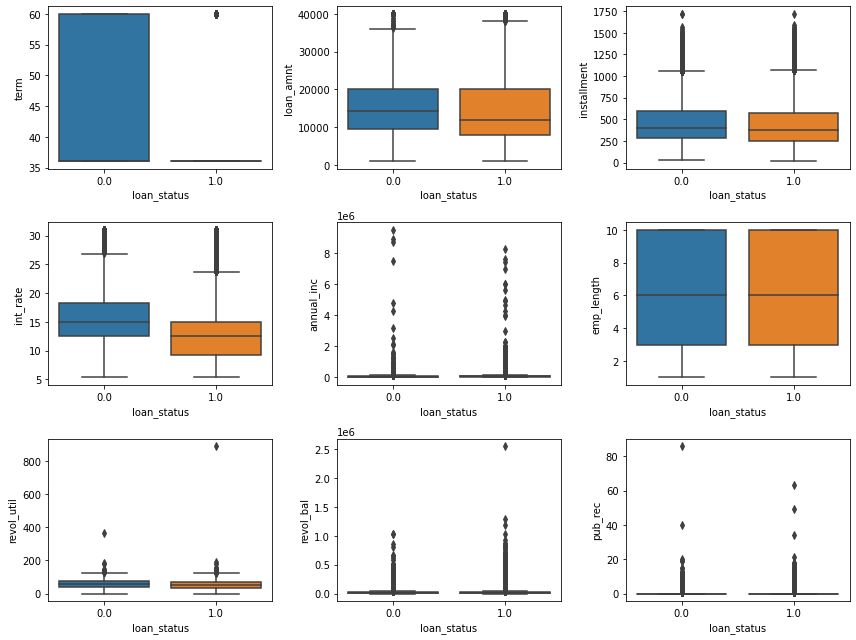

In [124]:
li_num_feats = list(numerical_columns)
nr_rows = 3
nr_cols = 3
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_num_feats):
            sns.boxplot(y=li_num_feats[i], x='loan_status', data=sub_loans, ax = axs[r][c])    
plt.tight_layout()    
plt.show()


It is noticeable that outliers are mostly seen in annual income, interest rate, dti, installment, total credit revolving balance and number of total accounts, all compared with loan status. 

It is also seen that there are not outliers in the length the borrowers have been employed.

In [125]:
numerical = sub_loans.select_dtypes(include = [np.number])
numerical

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,home_ownership,purpose,verification_status,loan_status,grade,sub_grade
8,36.0,11575.0,359.26,7.35,153000.0,6.0,22.7,8550.0,1.0,20.0,...,0.0,16.99,0.0,1.0,2.0,1.0,0.0,1.0,0.0,3.0
10,36.0,7200.0,285.70,24.85,50000.0,2.0,98.9,3560.0,0.0,4.0,...,0.0,6.07,0.0,0.0,3.0,2.0,1.0,1.0,4.0,22.0
24,36.0,7500.0,232.79,7.35,110000.0,7.0,27.2,23348.0,0.0,19.0,...,0.0,13.12,0.0,0.0,1.0,2.0,0.0,1.0,0.0,3.0
42,60.0,10000.0,243.29,16.02,51979.0,7.0,20.0,5733.0,2.0,15.0,...,0.0,10.11,0.0,2.0,3.0,2.0,1.0,1.0,2.0,14.0
91,36.0,14000.0,492.34,16.02,75000.0,7.0,90.0,2700.0,0.0,4.0,...,1.0,10.86,0.0,0.0,1.0,2.0,2.0,1.0,2.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884869,36.0,11575.0,404.61,15.59,25400.0,10.0,65.0,18266.0,0.0,9.0,...,0.0,27.08,0.0,0.0,3.0,1.0,2.0,1.0,3.0,15.0
884870,36.0,12000.0,398.52,11.99,63000.0,1.0,69.7,21110.0,0.0,13.0,...,1.0,23.69,0.0,0.0,1.0,1.0,2.0,0.0,1.0,9.0
884873,60.0,13000.0,316.07,15.99,35000.0,5.0,61.3,11031.0,1.0,9.0,...,0.0,30.90,0.0,1.0,3.0,2.0,2.0,0.0,3.0,16.0
884874,60.0,12000.0,317.86,19.99,64400.0,1.0,30.6,8254.0,0.0,17.0,...,1.0,27.19,0.0,0.0,3.0,2.0,1.0,0.0,4.0,22.0


In [126]:
numerical.describe()

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,home_ownership,purpose,verification_status,loan_status,grade,sub_grade
count,462191.000000,462191.000000,462191.000000,462191.000000,4.621910e+05,462191.000000,462191.000000,4.621910e+05,462191.000000,462191.000000,...,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000
mean,42.322062,14635.409171,441.383306,13.347814,7.562226e+04,6.086064,53.250248,1.630418e+04,0.239109,11.808999,...,0.342936,18.448868,0.057318,0.147383,1.903940,2.534446,1.001315,0.747570,1.865467,11.311339
std,10.571720,8527.926001,253.163070,4.520128,6.604570e+04,3.459656,23.857510,2.226781e+04,0.633339,5.471925,...,0.917497,8.827127,0.419338,0.397082,0.941603,2.178014,0.766540,0.434407,1.335903,6.602927
min,36.000000,1000.000000,14.010000,5.320000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,8000.000000,258.100000,9.990000,4.570000e+04,3.000000,35.600000,5.992000e+03,0.000000,8.000000,...,0.000000,12.110000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,6.000000
50%,36.000000,12600.000000,380.630000,12.990000,6.500000e+04,6.000000,53.600000,1.116000e+04,0.000000,11.000000,...,0.000000,17.920000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,2.000000,11.000000
75%,60.000000,20000.000000,581.450000,16.240000,9.000000e+04,10.000000,71.500000,1.987550e+04,0.000000,15.000000,...,0.000000,24.370000,0.000000,0.000000,3.000000,2.000000,2.000000,1.000000,3.000000,15.000000
max,60.000000,40000.000000,1719.830000,30.990000,9.500000e+06,10.000000,892.300000,2.560703e+06,86.000000,90.000000,...,39.000000,999.000000,85.000000,12.000000,3.000000,13.000000,2.000000,1.000000,6.000000,34.000000


Here we take care  of the outliers.

In [127]:
for col in numerical.columns:
    percentiles = numerical[col].quantile([0.01,0.99]).values
    numerical[col] = np.clip(numerical[col], percentiles[0], percentiles[1])

In [128]:
numerical.describe()

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,home_ownership,purpose,verification_status,loan_status,grade,sub_grade
count,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,...,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000,462191.000000
mean,42.322062,14636.466093,440.985059,13.336086,74183.345587,6.086064,53.238449,15570.150785,0.229548,11.762927,...,0.320714,18.421639,0.047093,0.135645,1.903944,2.536949,1.001315,0.747570,1.857576,11.291665
std,10.571720,8510.605379,251.102140,4.453103,41415.185974,3.459656,23.733147,14979.698707,0.530555,5.265564,...,0.754971,8.347852,0.258937,0.342412,0.941597,2.145502,0.766540,0.434407,1.314236,6.545099
min,36.000000,1800.000000,61.520000,5.930000,19000.000000,1.000000,2.300000,351.000000,0.000000,3.000000,...,0.000000,2.150000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,8000.000000,258.100000,9.990000,45700.000000,3.000000,35.600000,5992.000000,0.000000,8.000000,...,0.000000,12.110000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,6.000000
50%,36.000000,12600.000000,380.630000,12.990000,65000.000000,6.000000,53.600000,11160.000000,0.000000,11.000000,...,0.000000,17.920000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,2.000000,11.000000
75%,60.000000,20000.000000,581.450000,16.240000,90000.000000,10.000000,71.500000,19875.500000,0.000000,15.000000,...,0.000000,24.370000,0.000000,0.000000,3.000000,2.000000,2.000000,1.000000,3.000000,15.000000
max,60.000000,35000.000000,1197.580000,25.800000,250000.000000,10.000000,98.600000,91953.300000,3.000000,29.000000,...,4.000000,37.850000,2.000000,1.000000,3.000000,11.000000,2.000000,1.000000,5.000000,29.000000


## Scaling

We proceed to scale the variables. The only variables that can be scaled are the numerical ones, so we have to take the numerical ones of our dataset and proceed with the scaling.

In [129]:
#numerical = sub_loans.select_dtypes(include = [np.number])
numerical

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,home_ownership,purpose,verification_status,loan_status,grade,sub_grade
8,36.0,11575.0,359.26,7.35,153000.0,6.0,22.7,8550.0,1.0,20.0,...,0.0,16.99,0.0,1.0,2.0,1.0,0.0,1.0,0.0,3.0
10,36.0,7200.0,285.70,24.85,50000.0,2.0,98.6,3560.0,0.0,4.0,...,0.0,6.07,0.0,0.0,3.0,2.0,1.0,1.0,4.0,22.0
24,36.0,7500.0,232.79,7.35,110000.0,7.0,27.2,23348.0,0.0,19.0,...,0.0,13.12,0.0,0.0,1.0,2.0,0.0,1.0,0.0,3.0
42,60.0,10000.0,243.29,16.02,51979.0,7.0,20.0,5733.0,2.0,15.0,...,0.0,10.11,0.0,1.0,3.0,2.0,1.0,1.0,2.0,14.0
91,36.0,14000.0,492.34,16.02,75000.0,7.0,90.0,2700.0,0.0,4.0,...,1.0,10.86,0.0,0.0,1.0,2.0,2.0,1.0,2.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884869,36.0,11575.0,404.61,15.59,25400.0,10.0,65.0,18266.0,0.0,9.0,...,0.0,27.08,0.0,0.0,3.0,1.0,2.0,1.0,3.0,15.0
884870,36.0,12000.0,398.52,11.99,63000.0,1.0,69.7,21110.0,0.0,13.0,...,1.0,23.69,0.0,0.0,1.0,1.0,2.0,0.0,1.0,9.0
884873,60.0,13000.0,316.07,15.99,35000.0,5.0,61.3,11031.0,1.0,9.0,...,0.0,30.90,0.0,1.0,3.0,2.0,2.0,0.0,3.0,16.0
884874,60.0,12000.0,317.86,19.99,64400.0,1.0,30.6,8254.0,0.0,17.0,...,1.0,27.19,0.0,0.0,3.0,2.0,1.0,0.0,4.0,22.0


In [130]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462191 entries, 8 to 884875
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   term                  462191 non-null  float64
 1   loan_amnt             462191 non-null  float64
 2   installment           462191 non-null  float64
 3   int_rate              462191 non-null  float64
 4   annual_inc            462191 non-null  float64
 5   emp_length            462191 non-null  float64
 6   revol_util            462191 non-null  float64
 7   revol_bal             462191 non-null  float64
 8   pub_rec               462191 non-null  float64
 9   open_acc              462191 non-null  float64
 10  inq_last_6mths        462191 non-null  float64
 11  delinq_2yrs           462191 non-null  float64
 12  dti                   462191 non-null  float64
 13  tax_liens             462191 non-null  float64
 14  pub_rec_bankruptcies  462191 non-null  float64
 15  

As it can be only applied to the numerical variable, it is needed to delete the categorical variables from our dataset.

In [131]:
del sub_loans['loan_status']
del sub_loans['home_ownership']
del sub_loans['purpose']
del sub_loans['grade']
del sub_loans['sub_grade']
del sub_loans['verification_status']


In [132]:
sub_loans

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,inq_last_6mths,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies
8,36.0,11575.0,359.26,7.35,153000.0,6.0,22.7,8550.0,1.0,20.0,0.0,0.0,16.99,0.0,1.0
10,36.0,7200.0,285.70,24.85,50000.0,2.0,98.9,3560.0,0.0,4.0,0.0,0.0,6.07,0.0,0.0
24,36.0,7500.0,232.79,7.35,110000.0,7.0,27.2,23348.0,0.0,19.0,2.0,0.0,13.12,0.0,0.0
42,60.0,10000.0,243.29,16.02,51979.0,7.0,20.0,5733.0,2.0,15.0,0.0,0.0,10.11,0.0,2.0
91,36.0,14000.0,492.34,16.02,75000.0,7.0,90.0,2700.0,0.0,4.0,0.0,1.0,10.86,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884869,36.0,11575.0,404.61,15.59,25400.0,10.0,65.0,18266.0,0.0,9.0,0.0,0.0,27.08,0.0,0.0
884870,36.0,12000.0,398.52,11.99,63000.0,1.0,69.7,21110.0,0.0,13.0,0.0,1.0,23.69,0.0,0.0
884873,60.0,13000.0,316.07,15.99,35000.0,5.0,61.3,11031.0,1.0,9.0,0.0,0.0,30.90,0.0,1.0
884874,60.0,12000.0,317.86,19.99,64400.0,1.0,30.6,8254.0,0.0,17.0,2.0,1.0,27.19,0.0,0.0


We proceed to the scaling using the method Standard Scaler, turning it into a dataset.

In [133]:
standard_scaler = StandardScaler()
num_scaled = standard_scaler.fit_transform(sub_loans)
num_scaled = pd.DataFrame(num_scaled, index = sub_loans.index, columns = sub_loans.columns)

In [134]:
num_scaled

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,inq_last_6mths,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies
8,-0.598017,-0.358869,-0.324389,-1.326914,1.171580,-0.024876,-1.280531,-0.348224,1.201397,1.496916,-0.713546,-0.373774,-0.165271,-0.136688,2.147209
10,-0.598017,-0.871890,-0.614953,2.544662,-0.387948,-1.181062,1.913435,-0.572315,-0.377537,-1.427104,-0.713546,-0.373774,-1.402368,-0.136688,-0.371165
24,-0.598017,-0.836712,-0.823949,-1.326914,0.520515,0.264170,-1.091911,0.316323,-0.377537,1.314164,1.327741,-0.373774,-0.603693,-0.136688,-0.371165
42,1.672193,-0.543557,-0.782474,0.591176,-0.357984,0.264170,-1.393703,-0.474730,2.780331,0.583159,-0.713546,-0.373774,-0.944687,-0.136688,4.665582
91,-0.598017,-0.074509,0.201280,0.591176,-0.009422,0.264170,1.540387,-0.610936,-0.377537,-1.427104,-0.713546,0.716149,-0.859722,-0.136688,-0.371165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884869,-0.598017,-0.358869,-0.145256,0.496045,-0.760418,1.131309,0.492498,0.088101,-0.377537,-0.513348,-0.713546,-0.373774,0.977797,-0.136688,-0.371165
884870,-0.598017,-0.309033,-0.169311,-0.300393,-0.191114,-1.470109,0.689501,0.215820,-0.377537,0.217657,-0.713546,0.716149,0.593754,-0.136688,-0.371165
884873,1.672193,-0.191771,-0.494991,0.584539,-0.615064,-0.313923,0.337410,-0.236808,1.201397,-0.513348,-0.713546,-0.373774,1.410555,-0.136688,2.147209
884874,1.672193,-0.309033,-0.487920,1.469470,-0.169917,-1.470109,-0.949398,-0.361517,-0.377537,0.948662,1.327741,0.716149,0.990259,-0.136688,-0.371165


In [135]:
num_scaled.shape

(462191, 15)

In [136]:
categorical.shape

(462191, 6)

After this, it is needed to merge both of our datasets, the numerical scaled and the categorical.

In [137]:
loan_prepared = pd.merge(num_scaled, categorical, left_index = True, right_index = True)
loan_prepared.shape

(462191, 21)

It is seen that there are no missing values.

In [138]:
percentage_NaN = loan_prepared.apply(lambda x: sum(x.isna()/len(loan_prepared)))
percentage_NaN.sort_values(ascending = False)

verification_status     0.0
open_acc                0.0
loan_amnt               0.0
installment             0.0
int_rate                0.0
annual_inc              0.0
emp_length              0.0
revol_util              0.0
revol_bal               0.0
pub_rec                 0.0
inq_last_6mths          0.0
sub_grade               0.0
delinq_2yrs             0.0
dti                     0.0
tax_liens               0.0
pub_rec_bankruptcies    0.0
loan_status             0.0
home_ownership          0.0
purpose                 0.0
grade                   0.0
term                    0.0
dtype: float64

In [139]:
loan_prepared

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,loan_status,home_ownership,purpose,grade,sub_grade,verification_status
8,-0.598017,-0.358869,-0.324389,-1.326914,1.171580,-0.024876,-1.280531,-0.348224,1.201397,1.496916,...,-0.373774,-0.165271,-0.136688,2.147209,1.0,2.0,1.0,0.0,3.0,0.0
10,-0.598017,-0.871890,-0.614953,2.544662,-0.387948,-1.181062,1.913435,-0.572315,-0.377537,-1.427104,...,-0.373774,-1.402368,-0.136688,-0.371165,1.0,3.0,2.0,4.0,22.0,1.0
24,-0.598017,-0.836712,-0.823949,-1.326914,0.520515,0.264170,-1.091911,0.316323,-0.377537,1.314164,...,-0.373774,-0.603693,-0.136688,-0.371165,1.0,1.0,2.0,0.0,3.0,0.0
42,1.672193,-0.543557,-0.782474,0.591176,-0.357984,0.264170,-1.393703,-0.474730,2.780331,0.583159,...,-0.373774,-0.944687,-0.136688,4.665582,1.0,3.0,2.0,2.0,14.0,1.0
91,-0.598017,-0.074509,0.201280,0.591176,-0.009422,0.264170,1.540387,-0.610936,-0.377537,-1.427104,...,0.716149,-0.859722,-0.136688,-0.371165,1.0,1.0,2.0,2.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884869,-0.598017,-0.358869,-0.145256,0.496045,-0.760418,1.131309,0.492498,0.088101,-0.377537,-0.513348,...,-0.373774,0.977797,-0.136688,-0.371165,1.0,3.0,1.0,3.0,15.0,2.0
884870,-0.598017,-0.309033,-0.169311,-0.300393,-0.191114,-1.470109,0.689501,0.215820,-0.377537,0.217657,...,0.716149,0.593754,-0.136688,-0.371165,0.0,1.0,1.0,1.0,9.0,2.0
884873,1.672193,-0.191771,-0.494991,0.584539,-0.615064,-0.313923,0.337410,-0.236808,1.201397,-0.513348,...,-0.373774,1.410555,-0.136688,2.147209,0.0,3.0,2.0,3.0,16.0,2.0
884874,1.672193,-0.309033,-0.487920,1.469470,-0.169917,-1.470109,-0.949398,-0.361517,-0.377537,0.948662,...,0.716149,0.990259,-0.136688,-0.371165,0.0,3.0,2.0,4.0,22.0,1.0


In [140]:
loan_prepared.shape


(462191, 21)

In [141]:
type(loan_prepared)

pandas.core.frame.DataFrame

In [142]:
loan_prepared.to_csv('../data/Engineering_loans_final.csv', index = None, header=True)